In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, metrics
import numpy as np
import matplotlib.pyplot as plt

# Base Model

Found 4773 files belonging to 2 classes.
Found 632 files belonging to 2 classes.
Found 594 files belonging to 2 classes.
Epoch 1/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 321s 4s/step - accuracy: 0.6642 - loss: 0.8621 - precision: 0.6384 - recall: 0.6919 - val_accuracy: 0.8370 - val_loss: 0.3977 - val_precision: 0.7885 - val_recall: 0.9169
Epoch 2/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 321s 4s/step - accuracy: 0.8324 - loss: 0.3981 - precision: 0.8158 - recall: 0.8610 - val_accuracy: 0.8528 - val_loss: 0.3698 - val_precision: 0.8873 - val_recall: 0.8051
Epoch 3/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 317s 4s/step - accuracy: 0.8773 - loss: 0.3337 - precision: 0.8613 - recall: 0.8992 - val_accuracy: 0.8845 - val_loss: 0.2913 - val_precision: 0.8488 - val_recall: 0.9329
Epoch 4/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 318s 4s/step - accuracy: 0.8802 - loss: 0.3003 - precision: 0.8614 - recall: 0.9096 - val_accuracy: 0.8845 - val_loss: 0.2976 - val_precision: 0.8371 - val_recall: 0.9521
Epoch 5/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 315s 

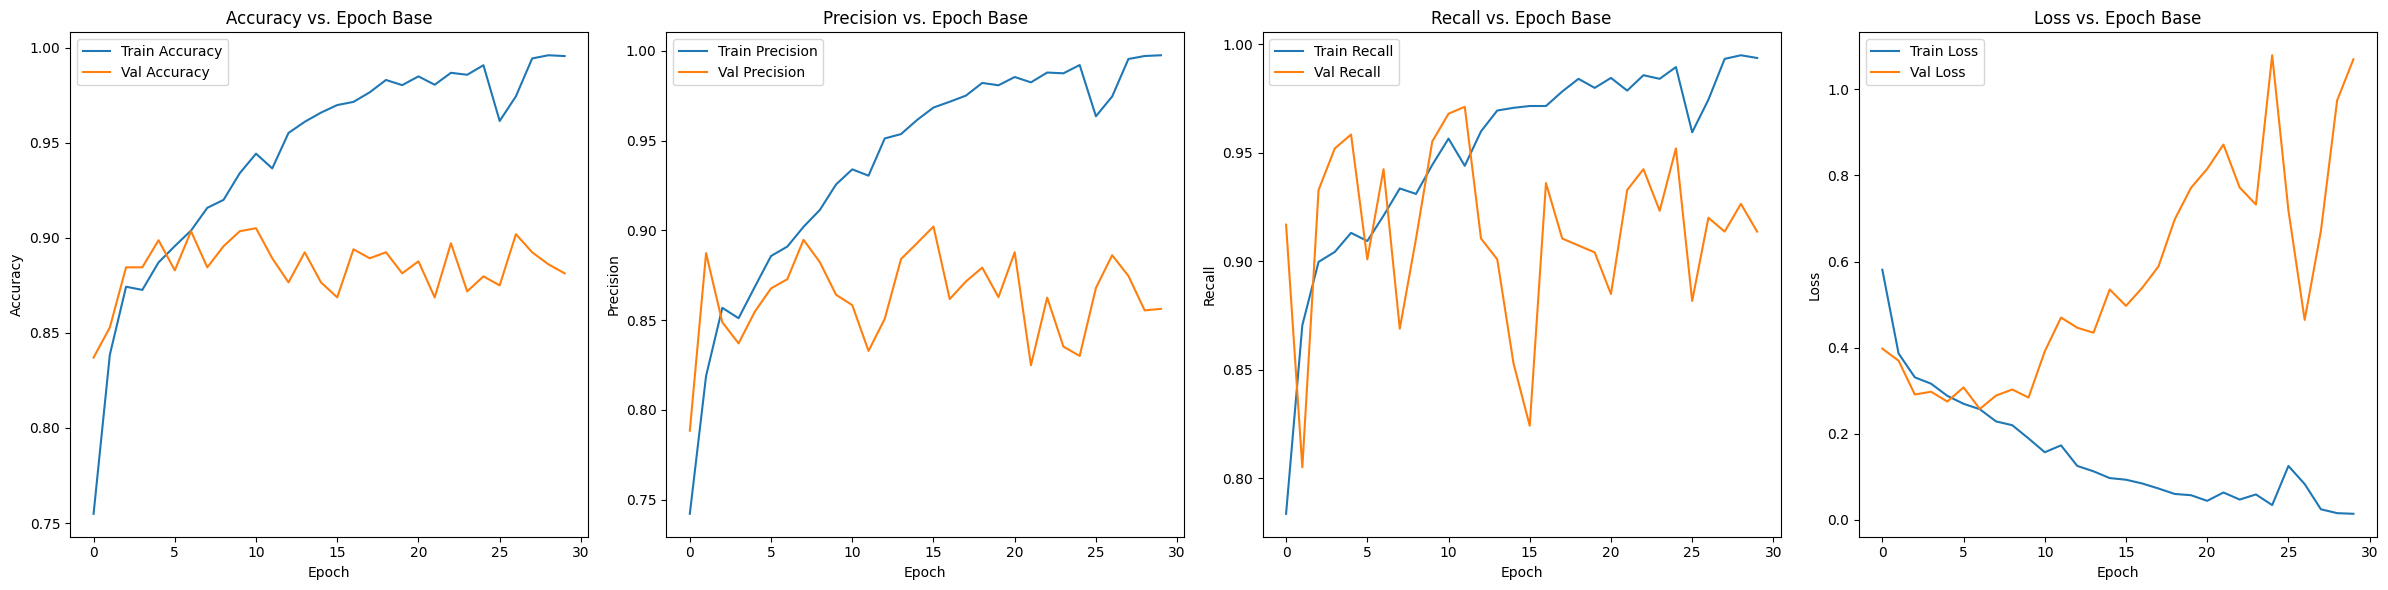

10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8848 - loss: 1.5164 - precision: 0.8379 - recall: 0.9563
Test Accuracy: 0.872
Test Precision: 0.817
Test Recall: 0.952
Test Loss: 1.593


In [2]:
train_ds_base = tf.keras.utils.image_dataset_from_directory(
    'processed_dataset/train',
    image_size=(512, 512),
    batch_size=64,
    label_mode='binary'
)

val_ds_base = tf.keras.utils.image_dataset_from_directory(
    'processed_dataset/val',
    image_size=(512, 512),
    batch_size=64,
    label_mode='binary'
)

test_ds_base = tf.keras.utils.image_dataset_from_directory(
    'processed_dataset/test',
    image_size=(512, 512),
    batch_size=64,
    label_mode='binary'
)

model_base = models.Sequential([
    layers.Input(shape=(512, 512, 3)),
    layers.Rescaling(1./255),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_base.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        metrics.Precision(name='precision'),
        metrics.Recall(name='recall')
    ]
)

history = model_base.fit(
    train_ds_base,
    validation_data=val_ds_base,
    epochs=30
)

acc_base = history.history['accuracy']
val_acc_base = history.history['val_accuracy']

precision_base = history.history['precision']
val_precision_base = history.history['val_precision']

recall_base = history.history['recall']
val_recall_base = history.history['val_recall']

loss_base = history.history['loss']
val_loss_base = history.history['val_loss']

epochs_range_base = range(len(acc_base))

plt.figure(figsize=(24, 6))

# Accuracy
plt.subplot(1, 4, 1)
plt.plot(epochs_range_base, acc_base, label='Train Accuracy')
plt.plot(epochs_range_base, val_acc_base, label='Val Accuracy')
plt.title('Accuracy vs. Epoch Base')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Precision
plt.subplot(1, 4, 2)
plt.plot(epochs_range_base, precision_base, label='Train Precision')
plt.plot(epochs_range_base, val_precision_base, label='Val Precision')
plt.title('Precision vs. Epoch Base')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()

# Recall
plt.subplot(1, 4, 3)
plt.plot(epochs_range_base, recall_base, label='Train Recall')
plt.plot(epochs_range_base, val_recall_base, label='Val Recall')
plt.title('Recall vs. Epoch Base')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()

# Loss
plt.subplot(1, 4, 4)
plt.plot(epochs_range_base, loss_base, label='Train Loss')
plt.plot(epochs_range_base, val_loss_base, label='Val Loss')
plt.title('Loss vs. Epoch Base')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on the test dataset
test_loss_base, test_acc_base, test_precision_base, test_recall_base = model_base.evaluate(test_ds_base)

# Print out the results
print(f"Test Accuracy: {test_acc_base:.3f}")
print(f"Test Precision: {test_precision_base:.3f}")
print(f"Test Recall: {test_recall_base:.3f}")
print(f"Test Loss: {test_loss_base:.3f}")

# Batch Size Testing

Training with batch size 8
Found 4773 files belonging to 2 classes.
Found 632 files belonging to 2 classes.
Found 594 files belonging to 2 classes.
Epoch 1/30
597/597 ━━━━━━━━━━━━━━━━━━━━ 340s 568ms/step - accuracy: 0.6548 - loss: 0.6417 - precision: 0.7026 - recall: 0.5794 - val_accuracy: 0.4937 - val_loss: 0.6187 - val_precision: 0.4945 - val_recall: 0.9968
Epoch 2/30
597/597 ━━━━━━━━━━━━━━━━━━━━ 346s 579ms/step - accuracy: 0.6893 - loss: 0.5820 - precision: 0.7695 - recall: 0.5748 - val_accuracy: 0.8354 - val_loss: 0.4802 - val_precision: 0.8693 - val_recall: 0.7859
Epoch 3/30
597/597 ━━━━━━━━━━━━━━━━━━━━ 340s 570ms/step - accuracy: 0.8379 - loss: 0.4242 - precision: 0.8532 - recall: 0.8253 - val_accuracy: 0.7642 - val_loss: 0.5125 - val_precision: 0.8228 - val_recall: 0.6677
Epoch 4/30
597/597 ━━━━━━━━━━━━━━━━━━━━ 338s 567ms/step - accuracy: 0.8432 - loss: 0.3869 - precision: 0.8440 - recall: 0.8519 - val_accuracy: 0.8228 - val_loss: 0.3954 - val_precision: 0.8972 - val_recall: 0.7

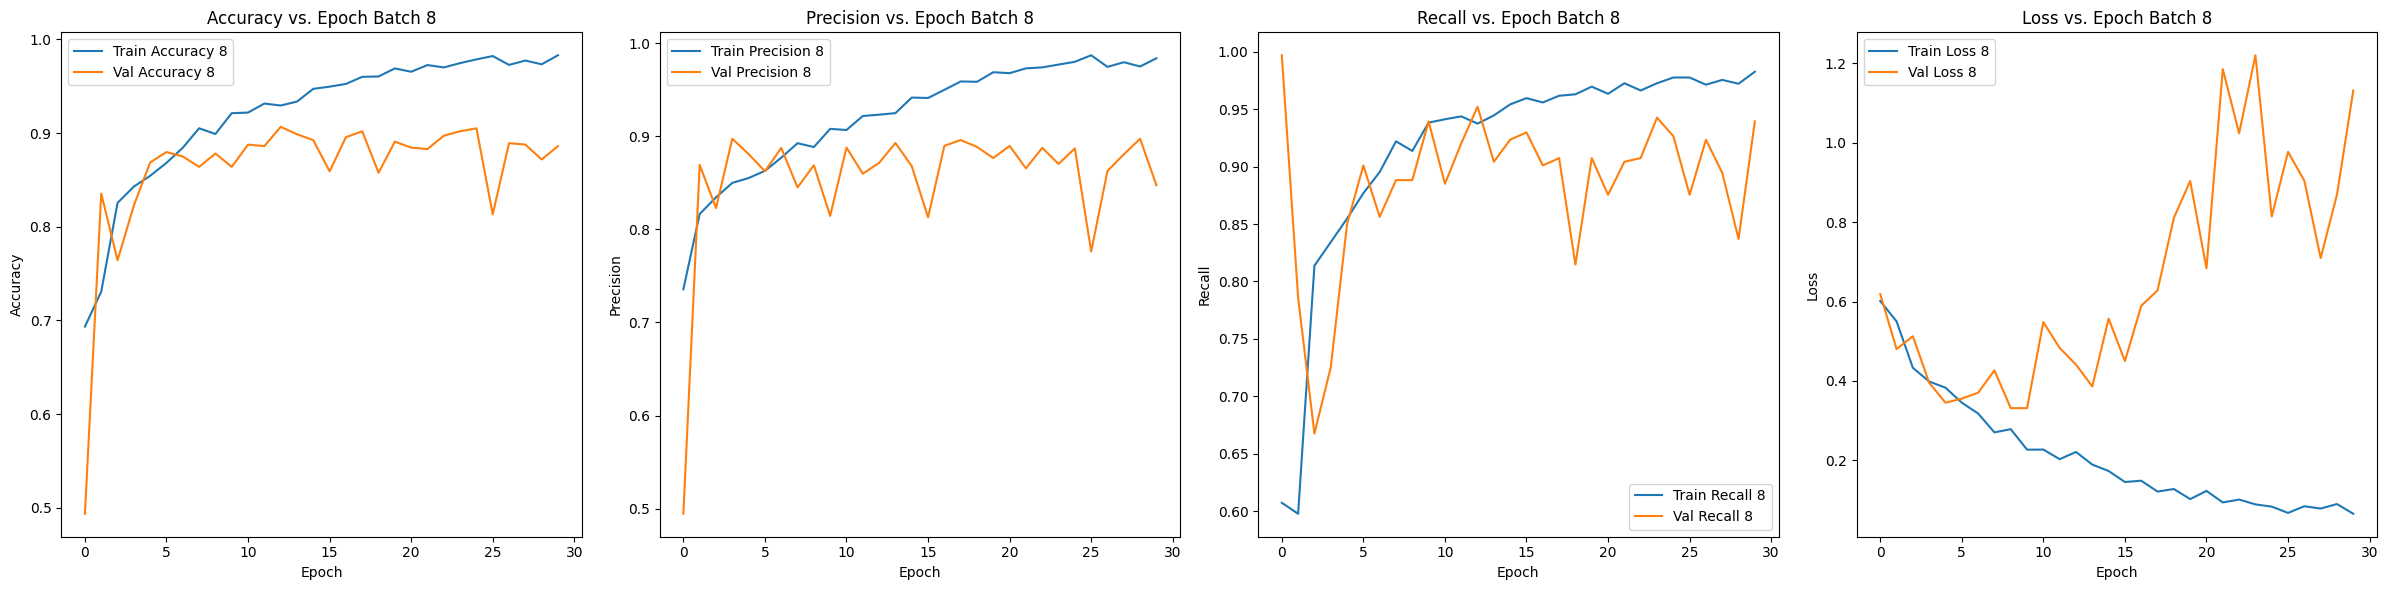

Training with batch size 16
Found 4773 files belonging to 2 classes.
Found 632 files belonging to 2 classes.
Found 594 files belonging to 2 classes.
Epoch 1/30
299/299 ━━━━━━━━━━━━━━━━━━━━ 327s 1s/step - accuracy: 0.6852 - loss: 0.6353 - precision: 0.6713 - recall: 0.7057 - val_accuracy: 0.8228 - val_loss: 0.4299 - val_precision: 0.8736 - val_recall: 0.7508
Epoch 2/30
299/299 ━━━━━━━━━━━━━━━━━━━━ 328s 1s/step - accuracy: 0.8213 - loss: 0.4189 - precision: 0.7881 - recall: 0.8721 - val_accuracy: 0.8623 - val_loss: 0.3526 - val_precision: 0.8404 - val_recall: 0.8914
Epoch 3/30
299/299 ━━━━━━━━━━━━━━━━━━━━ 329s 1s/step - accuracy: 0.8461 - loss: 0.3817 - precision: 0.8178 - recall: 0.8844 - val_accuracy: 0.8354 - val_loss: 0.3715 - val_precision: 0.8317 - val_recall: 0.8371
Epoch 4/30
299/299 ━━━━━━━━━━━━━━━━━━━━ 329s 1s/step - accuracy: 0.8656 - loss: 0.3541 - precision: 0.8300 - recall: 0.9144 - val_accuracy: 0.8734 - val_loss: 0.3036 - val_precision: 0.8263 - val_recall: 0.9425
Epoch 5

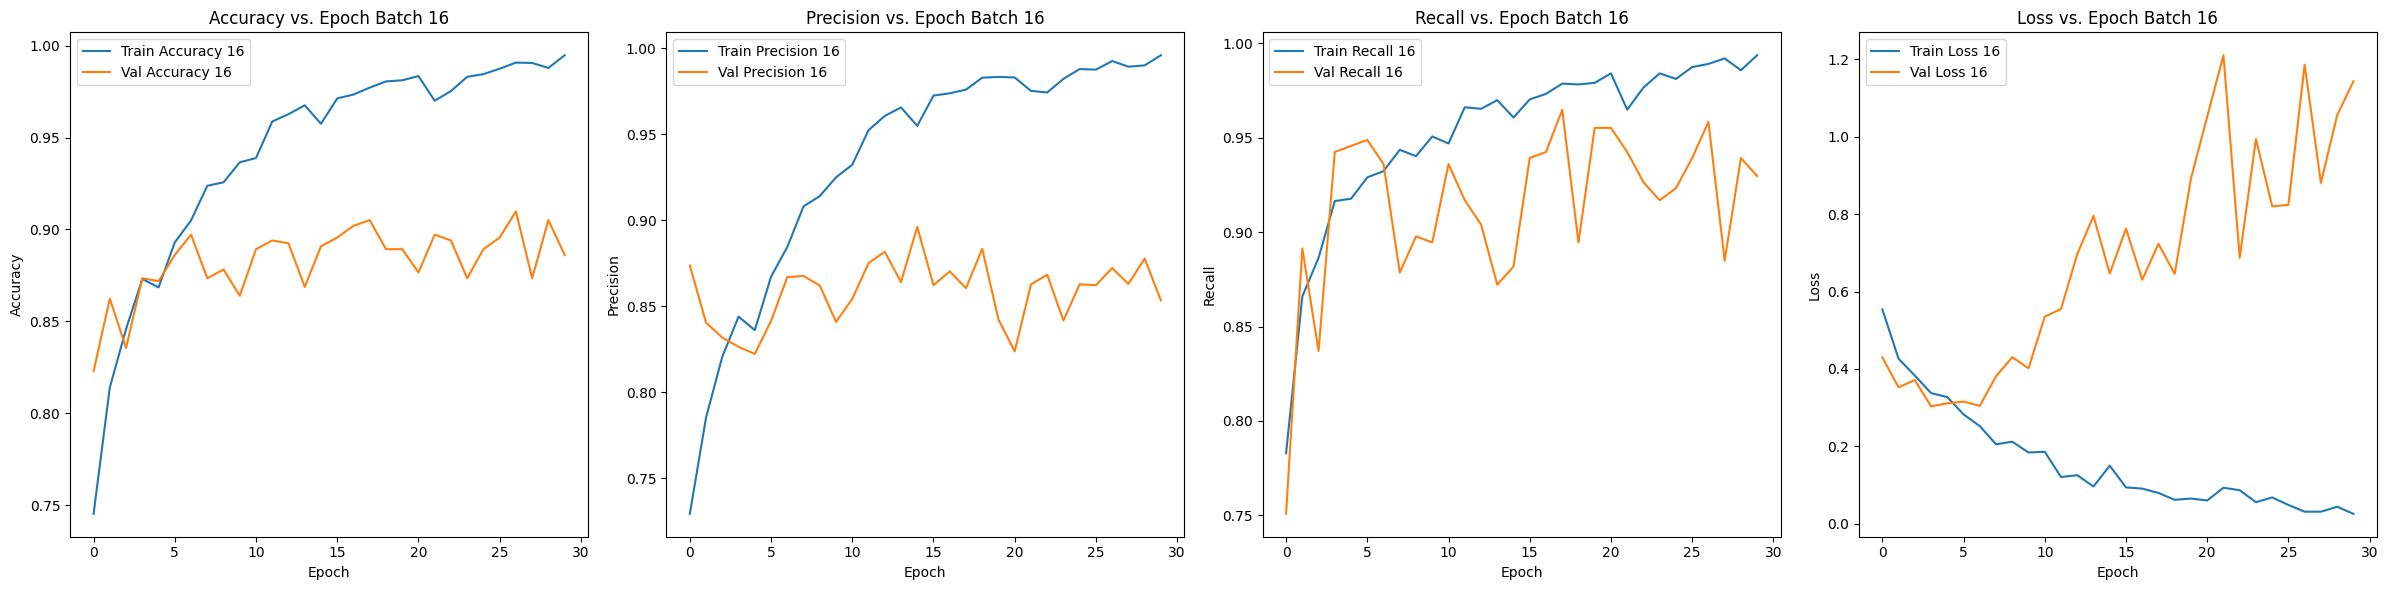

Training with batch size 32
Found 4773 files belonging to 2 classes.
Found 632 files belonging to 2 classes.
Found 594 files belonging to 2 classes.
Epoch 1/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 324s 2s/step - accuracy: 0.6840 - loss: 0.6477 - precision: 0.6952 - recall: 0.6674 - val_accuracy: 0.8180 - val_loss: 0.4318 - val_precision: 0.8992 - val_recall: 0.7125
Epoch 2/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 328s 2s/step - accuracy: 0.8334 - loss: 0.4107 - precision: 0.8187 - recall: 0.8609 - val_accuracy: 0.8576 - val_loss: 0.3799 - val_precision: 0.8754 - val_recall: 0.8307
Epoch 3/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 328s 2s/step - accuracy: 0.8550 - loss: 0.3653 - precision: 0.8531 - recall: 0.8610 - val_accuracy: 0.8687 - val_loss: 0.3135 - val_precision: 0.8833 - val_recall: 0.8466
Epoch 4/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 326s 2s/step - accuracy: 0.8758 - loss: 0.3230 - precision: 0.8689 - recall: 0.8881 - val_accuracy: 0.8576 - val_loss: 0.3217 - val_precision: 0.8858 - val_recall: 0.8179
Epoch 5

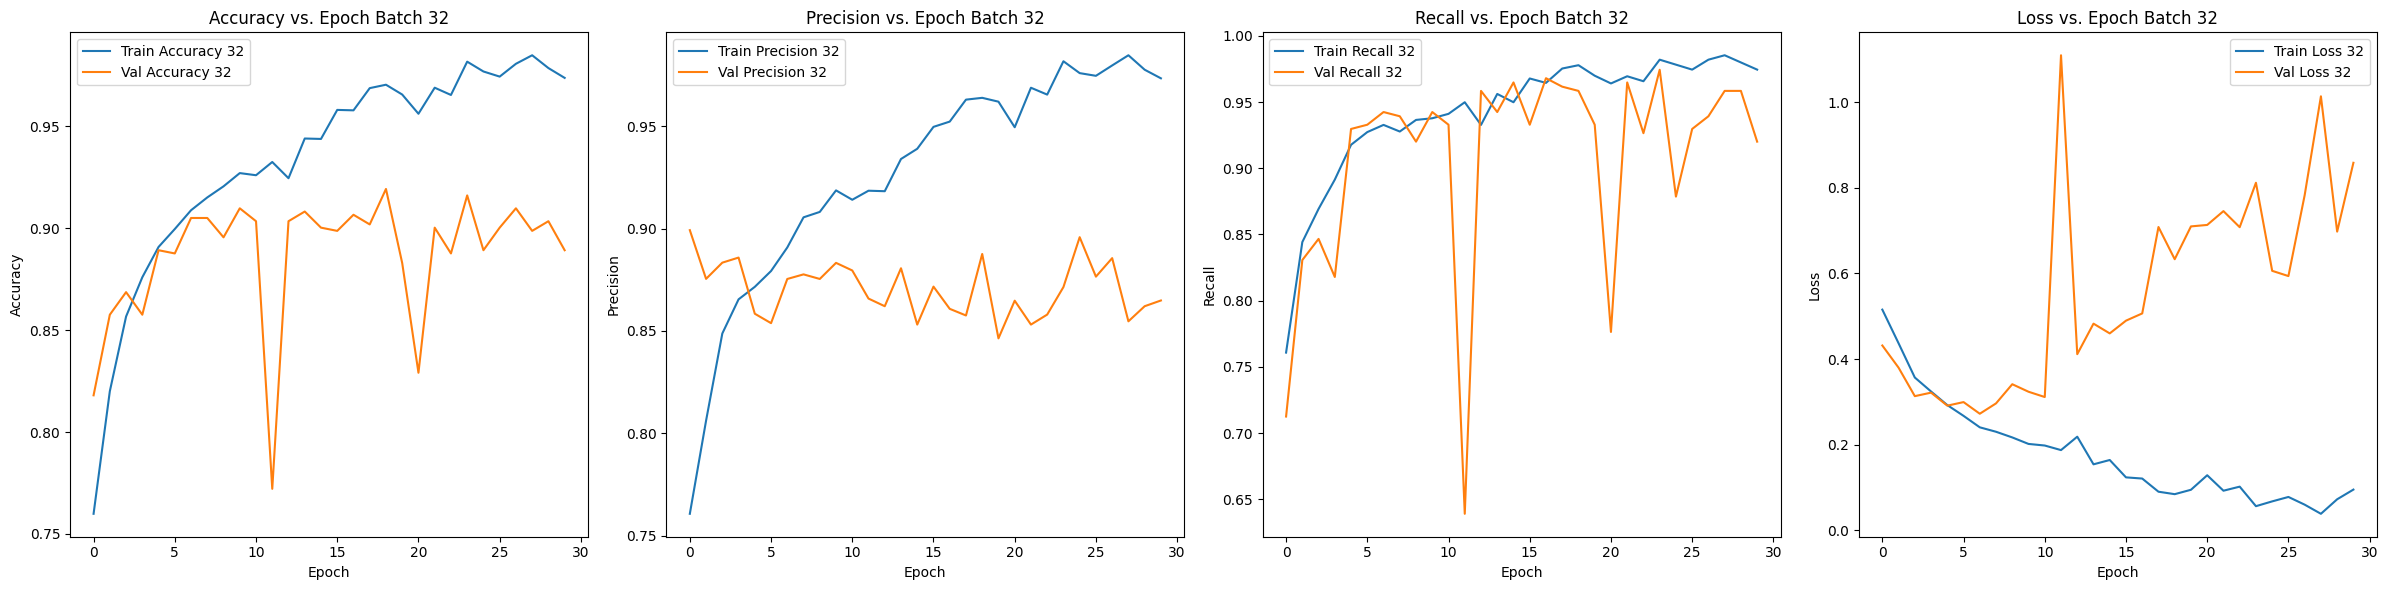

Training with batch size 64
Found 4773 files belonging to 2 classes.
Found 632 files belonging to 2 classes.
Found 594 files belonging to 2 classes.
Epoch 1/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 334s 4s/step - accuracy: 0.6296 - loss: 0.8471 - precision: 0.6506 - recall: 0.6171 - val_accuracy: 0.8339 - val_loss: 0.4103 - val_precision: 0.8059 - val_recall: 0.8754
Epoch 2/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 385s 5s/step - accuracy: 0.8084 - loss: 0.4490 - precision: 0.8114 - recall: 0.8213 - val_accuracy: 0.8180 - val_loss: 0.4002 - val_precision: 0.8808 - val_recall: 0.7316
Epoch 3/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 380s 5s/step - accuracy: 0.8389 - loss: 0.4014 - precision: 0.8297 - recall: 0.8672 - val_accuracy: 0.8703 - val_loss: 0.4046 - val_precision: 0.8329 - val_recall: 0.9233
Epoch 4/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 379s 5s/step - accuracy: 0.8713 - loss: 0.3602 - precision: 0.8539 - recall: 0.9061 - val_accuracy: 0.8687 - val_loss: 0.3158 - val_precision: 0.8194 - val_recall: 0.9425
Epoch 5/30
75/7

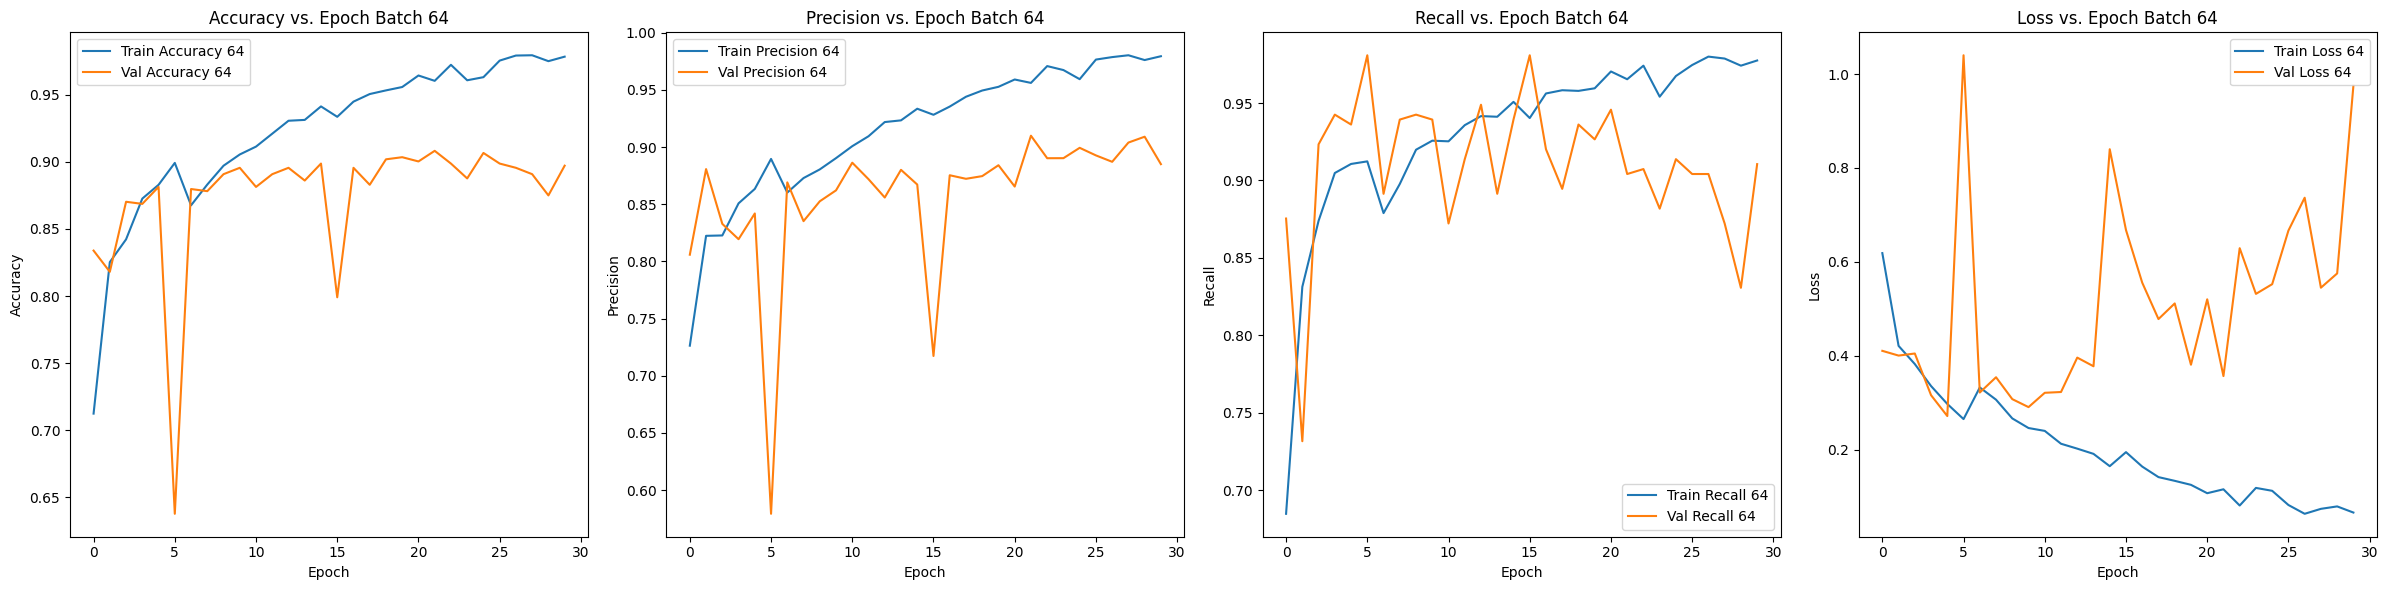

Training with batch size 128
Found 4773 files belonging to 2 classes.
Found 632 files belonging to 2 classes.
Found 594 files belonging to 2 classes.
Epoch 1/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 413s 11s/step - accuracy: 0.5799 - loss: 1.0797 - precision: 0.5829 - recall: 0.5509 - val_accuracy: 0.8354 - val_loss: 0.4161 - val_precision: 0.8828 - val_recall: 0.7700
Epoch 2/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 481s 13s/step - accuracy: 0.8175 - loss: 0.4394 - precision: 0.8141 - recall: 0.8338 - val_accuracy: 0.8528 - val_loss: 0.3453 - val_precision: 0.8901 - val_recall: 0.8019
Epoch 3/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 480s 13s/step - accuracy: 0.8605 - loss: 0.3512 - precision: 0.8601 - recall: 0.8698 - val_accuracy: 0.8544 - val_loss: 0.3391 - val_precision: 0.8989 - val_recall: 0.7955
Epoch 4/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 477s 13s/step - accuracy: 0.8654 - loss: 0.3425 - precision: 0.8693 - recall: 0.8675 - val_accuracy: 0.8987 - val_loss: 0.2682 - val_precision: 0.8784 - val_recall: 0.9233
Epoch 5/30

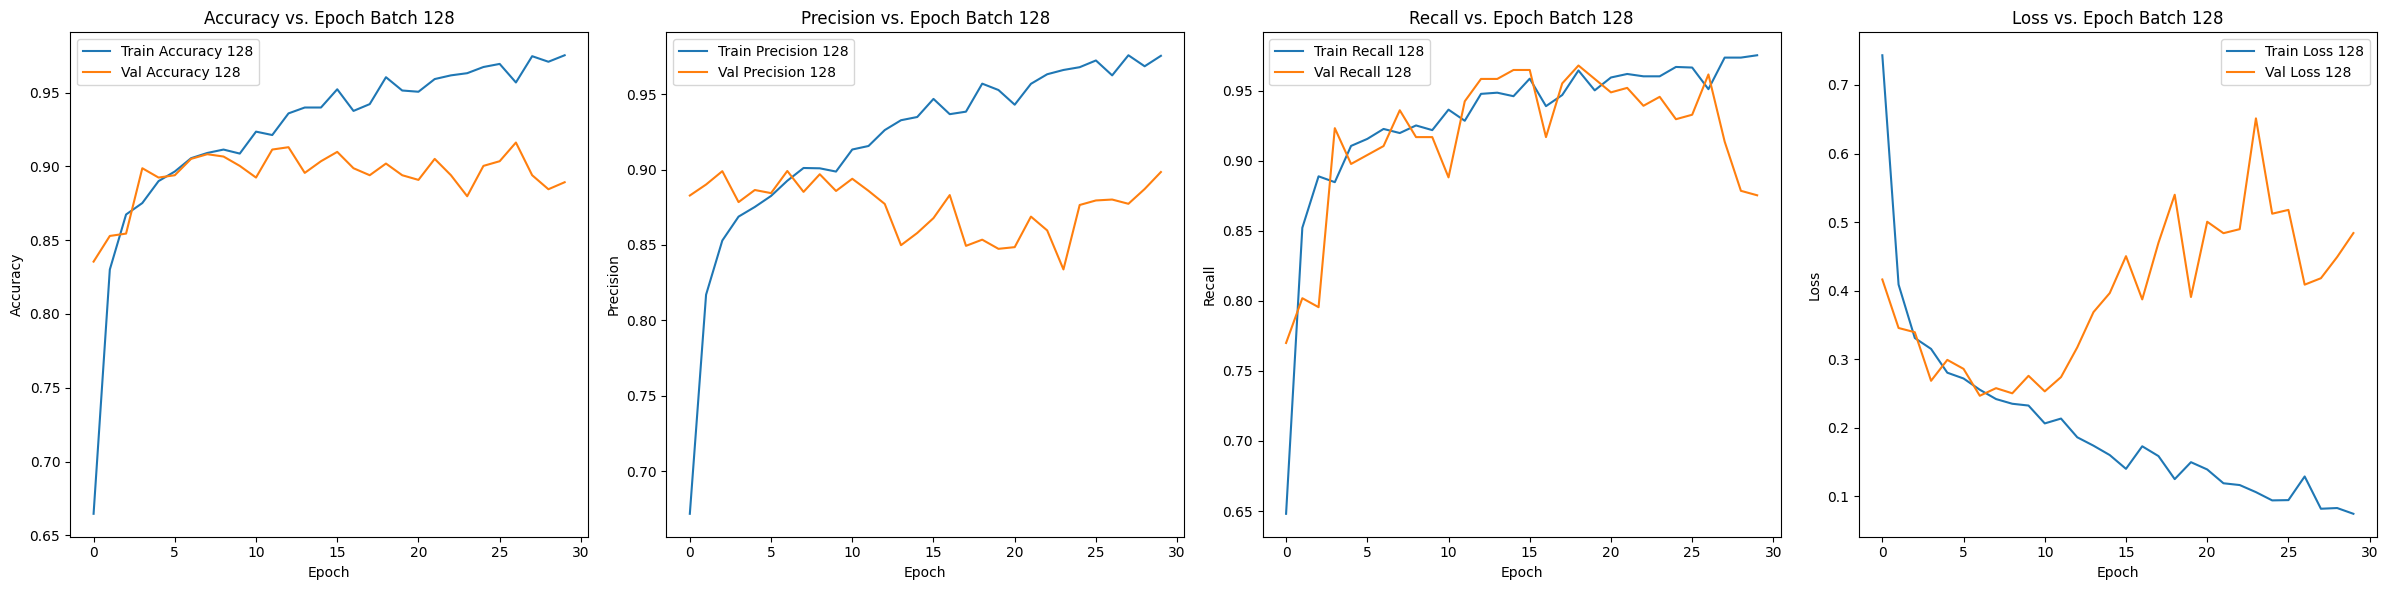

Training with batch size 256
Found 4773 files belonging to 2 classes.
Found 632 files belonging to 2 classes.
Found 594 files belonging to 2 classes.
Epoch 1/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 518s 27s/step - accuracy: 0.5581 - loss: 1.2141 - precision: 0.5735 - recall: 0.5184 - val_accuracy: 0.8196 - val_loss: 0.4882 - val_precision: 0.8541 - val_recall: 0.7668
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 514s 27s/step - accuracy: 0.7635 - loss: 0.5263 - precision: 0.7820 - recall: 0.7266 - val_accuracy: 0.7785 - val_loss: 0.4965 - val_precision: 0.9100 - val_recall: 0.6134
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 522s 27s/step - accuracy: 0.7848 - loss: 0.4724 - precision: 0.7723 - recall: 0.8096 - val_accuracy: 0.8560 - val_loss: 0.3628 - val_precision: 0.8627 - val_recall: 0.8435
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 517s 27s/step - accuracy: 0.8258 - loss: 0.3998 - precision: 0.8038 - recall: 0.8583 - val_accuracy: 0.8703 - val_loss: 0.3418 - val_precision: 0.8427 - val_recall: 0.9073
Epoch 5/30

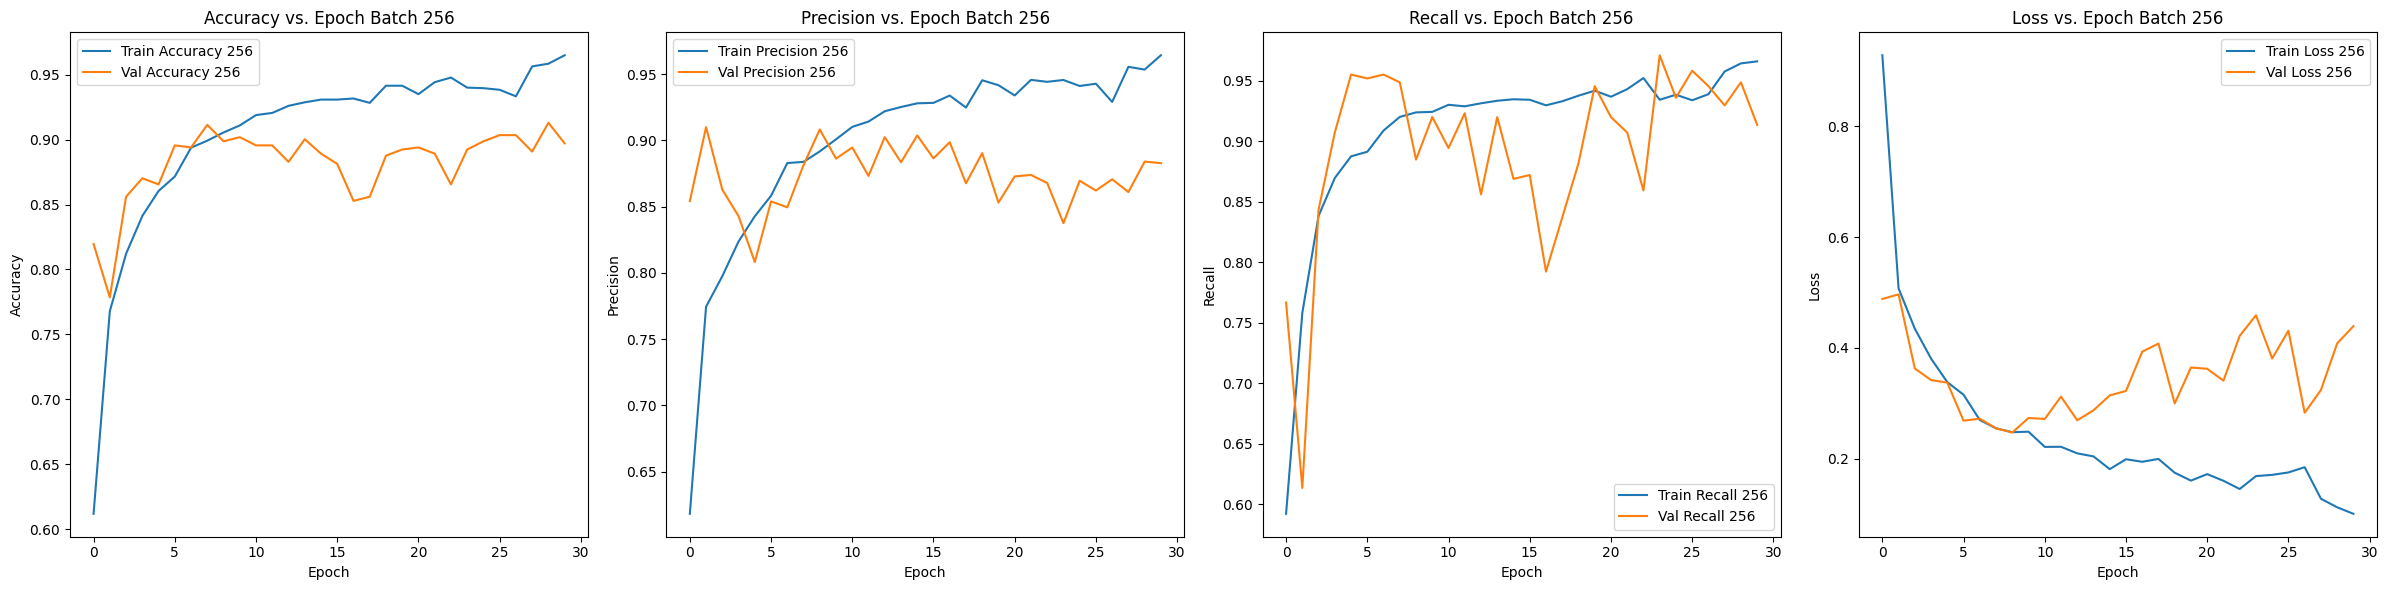

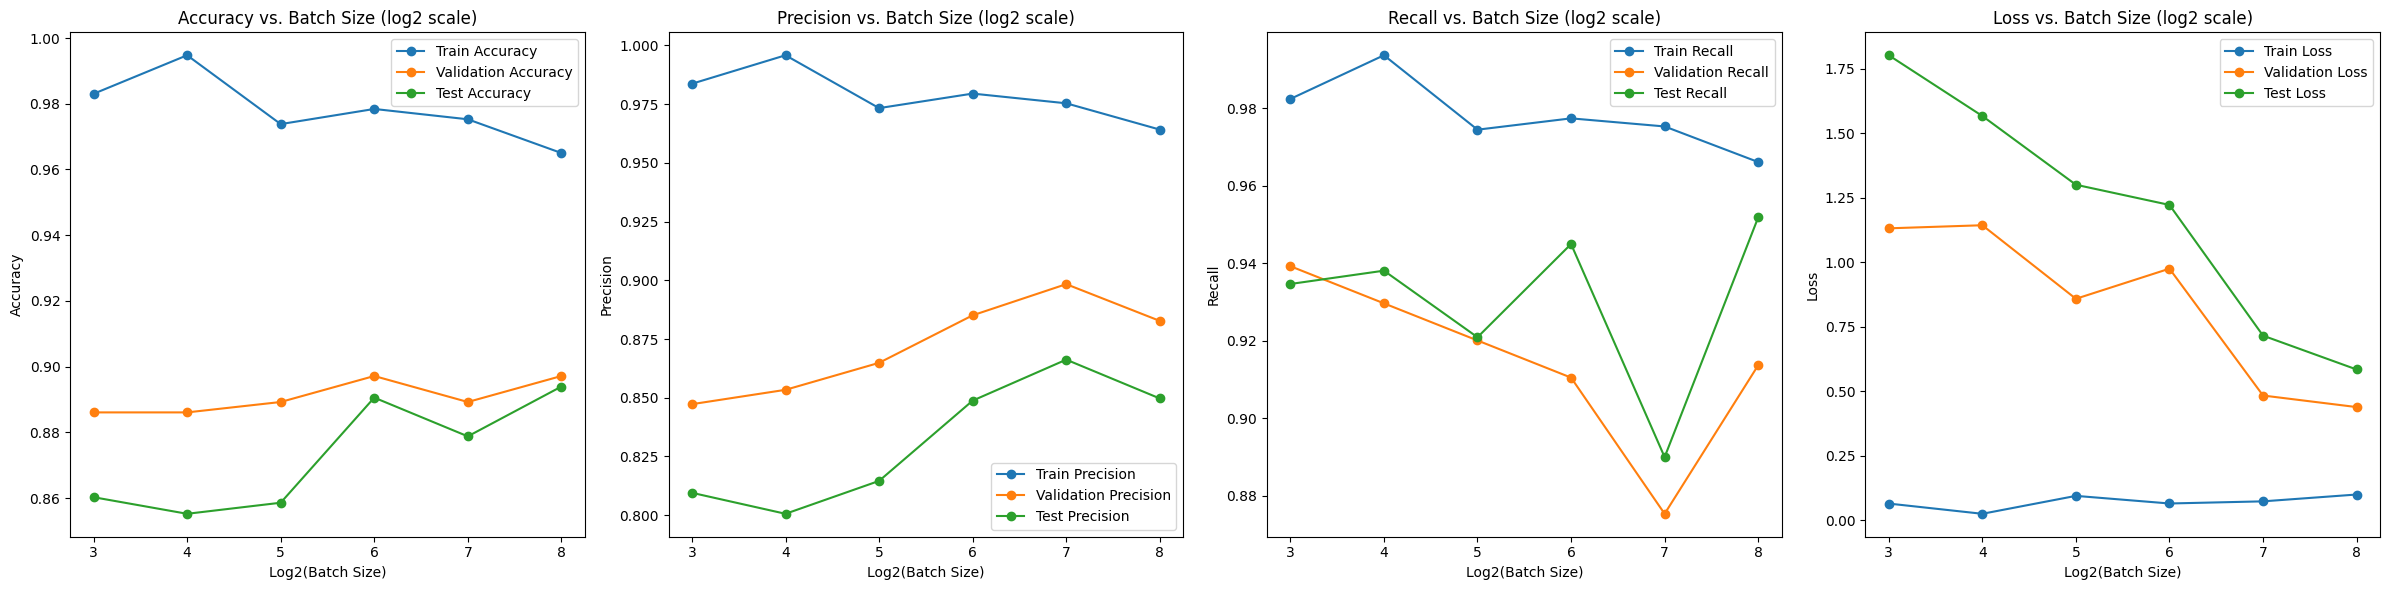

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models, metrics
import numpy as np
import matplotlib.pyplot as plt

batch_sizes = [8, 16, 32, 64, 128, 256]

# Initialize lists to store metrics for train, val, and test datasets
train_accuracies = []
val_accuracies = []
test_accuracies = []

train_precisions = []
val_precisions = []
test_precisions = []

train_recalls = []
val_recalls = []
test_recalls = []

train_losses = []
val_losses = []
test_losses = []

for current_batch_size in batch_sizes:
    print(f"Training with batch size {current_batch_size}")
    AUTOTUNE = tf.data.AUTOTUNE

    #  Load datasets with the current batch size
    train_ds = tf.keras.utils.image_dataset_from_directory(
        'processed_dataset/train',
        image_size=(512, 512),
        batch_size=current_batch_size,
        label_mode='binary'
    ).cache().prefetch(buffer_size=AUTOTUNE)

    val_ds = tf.keras.utils.image_dataset_from_directory(
        'processed_dataset/val',
        image_size=(512, 512),
        batch_size=current_batch_size,
        label_mode='binary'
    ).cache().prefetch(buffer_size=AUTOTUNE)

    test_ds = tf.keras.utils.image_dataset_from_directory(
        'processed_dataset/test',
        image_size=(512, 512),
        batch_size=current_batch_size,
        label_mode='binary'
    ).cache().prefetch(buffer_size=AUTOTUNE)

    
    # Build and compile the model
    model = models.Sequential([
        layers.Input(shape=(512, 512, 3)),
        layers.Rescaling(1./255),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=[
            'accuracy',
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall')
        ]
    )
    
    # Train the model
    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=30
    )
    
    # Evaluate the model
    test_loss, test_acc, test_precision, test_recall = model.evaluate(test_ds)
    
    # Print test results
    print(f"Batch Size {current_batch_size}:")
    print(f"Test Accuracy: {test_acc:.3f}")
    print(f"Test Precision: {test_precision:.3f}")
    print(f"Test Recall: {test_recall:.3f}")
    print(f"Test Loss: {test_loss:.3f}")
    
    # Append the test results to the lists for plotting
    test_accuracies.append(test_acc)
    test_precisions.append(test_precision)
    test_recalls.append(test_recall)
    test_losses.append(test_loss)
    
    # Plot results
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    precision = history.history['precision']
    val_precision = history.history['val_precision']
    recall = history.history['recall']
    val_recall = history.history['val_recall']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    train_accuracies.append(acc[-1])
    val_accuracies.append(val_acc[-1])

    train_precisions.append(precision[-1])
    val_precisions.append(val_precision[-1])

    train_recalls.append(recall[-1])
    val_recalls.append(val_recall[-1])

    train_losses.append(loss[-1])
    val_losses.append(val_loss[-1])
    
    epochs_range = range(len(acc))
    
    plt.figure(figsize=(24, 6))
    
    plt.subplot(1, 4, 1)
    plt.plot(epochs_range, acc, label=f'Train Accuracy {current_batch_size}')
    plt.plot(epochs_range, val_acc, label=f'Val Accuracy {current_batch_size}')
    plt.title(f'Accuracy vs. Epoch Batch {current_batch_size}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 4, 2)
    plt.plot(epochs_range, precision, label=f'Train Precision {current_batch_size}')
    plt.plot(epochs_range, val_precision, label=f'Val Precision {current_batch_size}')
    plt.title(f'Precision vs. Epoch Batch {current_batch_size}')
    plt.xlabel('Epoch')
    plt.ylabel('Precision')
    plt.legend()
    
    plt.subplot(1, 4, 3)
    plt.plot(epochs_range, recall, label=f'Train Recall {current_batch_size}')
    plt.plot(epochs_range, val_recall, label=f'Val Recall {current_batch_size}')
    plt.title(f'Recall vs. Epoch Batch {current_batch_size}')
    plt.xlabel('Epoch')
    plt.ylabel('Recall')
    plt.legend()
    
    plt.subplot(1, 4, 4)
    plt.plot(epochs_range, loss, label=f'Train Loss {current_batch_size}')
    plt.plot(epochs_range, val_loss, label=f'Val Loss {current_batch_size}')
    plt.title(f'Loss vs. Epoch Batch {current_batch_size}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Convert batch sizes to log2 scale
log_batch_sizes = np.log2(batch_sizes)

# Plot the results for train, validation, and test metrics vs batch size on a log2 scale
plt.figure(figsize=(24, 6))

# Accuracy vs Batch Size (log2 scale)
plt.subplot(1, 4, 1)
plt.plot(log_batch_sizes, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(log_batch_sizes, val_accuracies, label='Validation Accuracy', marker='o')
plt.plot(log_batch_sizes, test_accuracies, label='Test Accuracy', marker='o')
plt.title('Accuracy vs. Batch Size (log2 scale)')
plt.xlabel('Log2(Batch Size)')
plt.ylabel('Accuracy')
plt.legend()

# Precision vs Batch Size (log2 scale)
plt.subplot(1, 4, 2)
plt.plot(log_batch_sizes, train_precisions, label='Train Precision', marker='o')
plt.plot(log_batch_sizes, val_precisions, label='Validation Precision', marker='o')
plt.plot(log_batch_sizes, test_precisions, label='Test Precision', marker='o')
plt.title('Precision vs. Batch Size (log2 scale)')
plt.xlabel('Log2(Batch Size)')
plt.ylabel('Precision')
plt.legend()

# Recall vs Batch Size (log2 scale)
plt.subplot(1, 4, 3)
plt.plot(log_batch_sizes, train_recalls, label='Train Recall', marker='o')
plt.plot(log_batch_sizes, val_recalls, label='Validation Recall', marker='o')
plt.plot(log_batch_sizes, test_recalls, label='Test Recall', marker='o')
plt.title('Recall vs. Batch Size (log2 scale)')
plt.xlabel('Log2(Batch Size)')
plt.ylabel('Recall')
plt.legend()

# Loss vs Batch Size (log2 scale)
plt.subplot(1, 4, 4)
plt.plot(log_batch_sizes, train_losses, label='Train Loss', marker='o')
plt.plot(log_batch_sizes, val_losses, label='Validation Loss', marker='o')
plt.plot(log_batch_sizes, test_losses, label='Test Loss', marker='o')
plt.title('Loss vs. Batch Size (log2 scale)')
plt.xlabel('Log2(Batch Size)')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Fully Connected Layers Testing

Found 4773 files belonging to 2 classes.
Found 632 files belonging to 2 classes.
Found 594 files belonging to 2 classes.

Training with 1 Dense Layers
Epoch 1/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 325s 4s/step - accuracy: 0.6342 - loss: 1.0747 - precision: 0.6464 - recall: 0.6183 - val_accuracy: 0.8291 - val_loss: 0.4096 - val_precision: 0.7733 - val_recall: 0.9265
Epoch 2/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 366s 5s/step - accuracy: 0.8192 - loss: 0.4320 - precision: 0.8082 - recall: 0.8346 - val_accuracy: 0.8560 - val_loss: 0.3218 - val_precision: 0.8101 - val_recall: 0.9265
Epoch 3/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 365s 5s/step - accuracy: 0.8391 - loss: 0.3851 - precision: 0.8213 - recall: 0.8649 - val_accuracy: 0.8544 - val_loss: 0.3702 - val_precision: 0.9108 - val_recall: 0.7827
Epoch 4/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 380s 5s/step - accuracy: 0.8624 - loss: 0.3661 - precision: 0.8656 - recall: 0.8567 - val_accuracy: 0.8877 - val_loss: 0.2938 - val_precision: 0.9007 - val_recall: 0.8690
Epoch 5/30
75

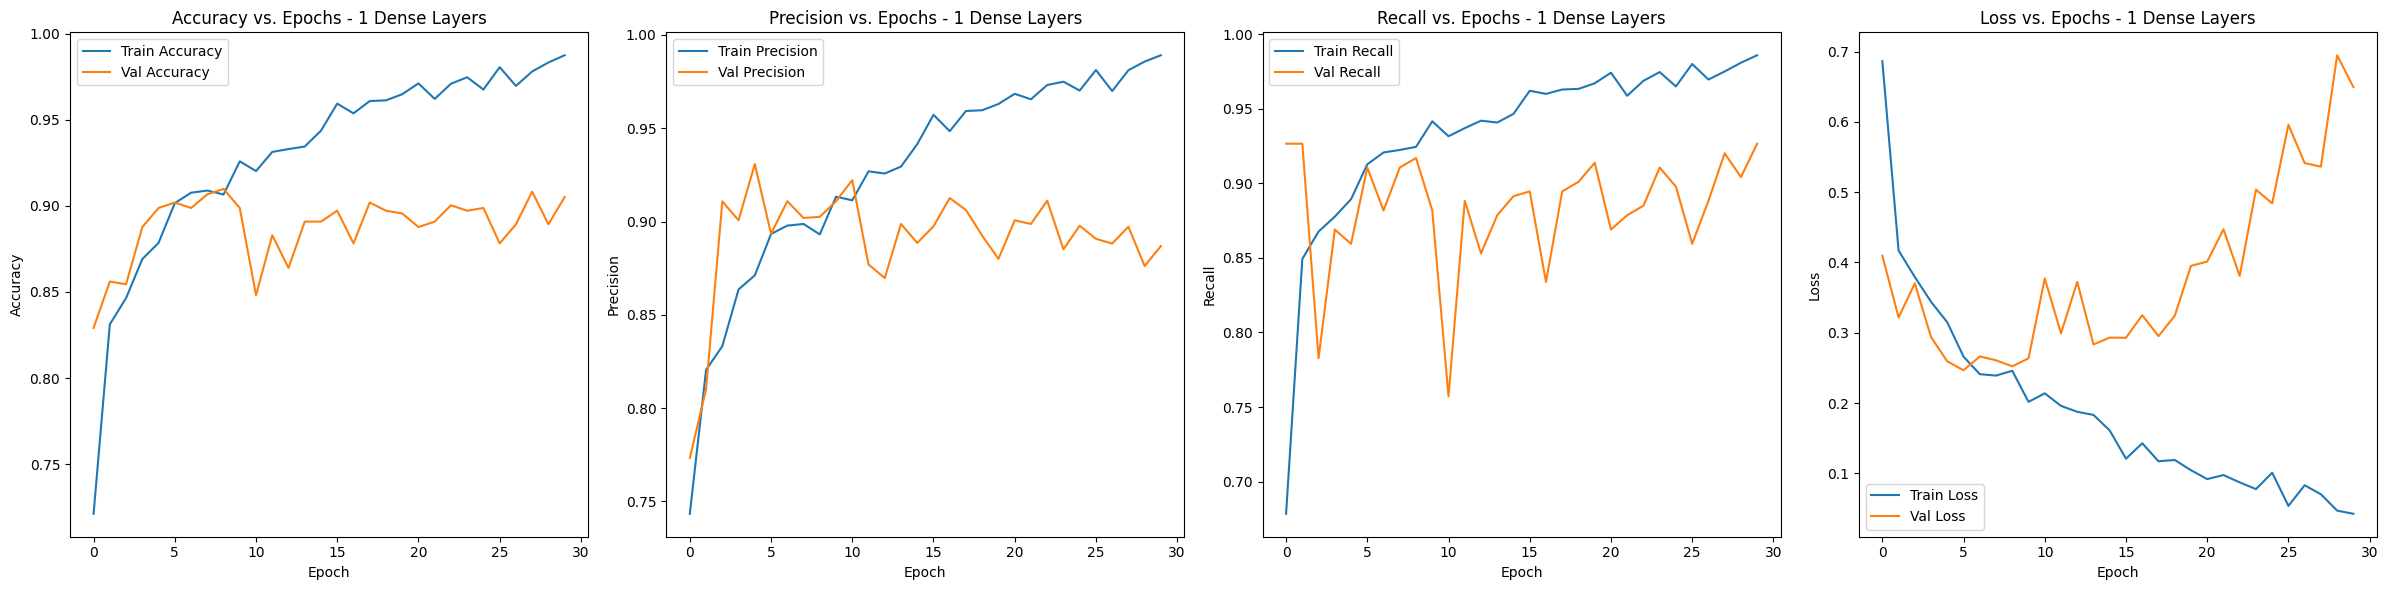


Training with 2 Dense Layers
Epoch 1/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 402s 5s/step - accuracy: 0.6163 - loss: 1.2871 - precision: 0.6059 - recall: 0.6197 - val_accuracy: 0.8370 - val_loss: 0.4396 - val_precision: 0.9134 - val_recall: 0.7412
Epoch 2/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 383s 5s/step - accuracy: 0.8170 - loss: 0.4461 - precision: 0.8347 - recall: 0.7897 - val_accuracy: 0.8528 - val_loss: 0.3761 - val_precision: 0.8416 - val_recall: 0.8658
Epoch 3/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 381s 5s/step - accuracy: 0.8547 - loss: 0.3799 - precision: 0.8543 - recall: 0.8530 - val_accuracy: 0.8687 - val_loss: 0.3360 - val_precision: 0.8686 - val_recall: 0.8658
Epoch 4/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 377s 5s/step - accuracy: 0.8656 - loss: 0.3472 - precision: 0.8512 - recall: 0.8853 - val_accuracy: 0.8687 - val_loss: 0.3340 - val_precision: 0.8506 - val_recall: 0.8914
Epoch 5/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 380s 5s/step - accuracy: 0.8589 - loss: 0.3743 - precision: 0.8554 - recall: 0.8625 - val_accura

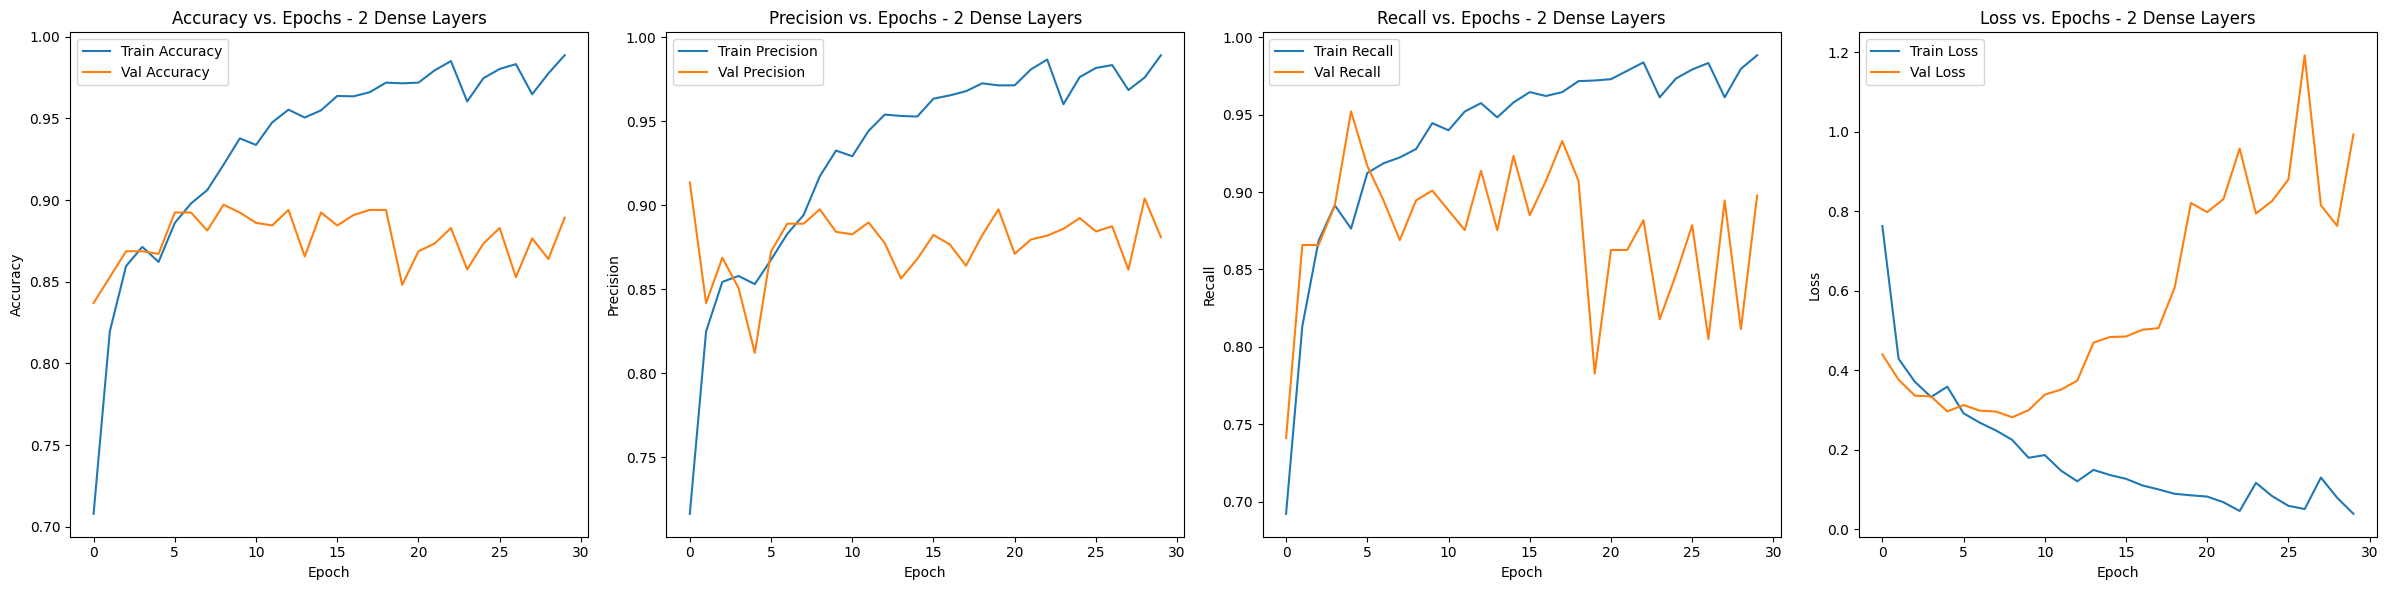


Training with 3 Dense Layers
Epoch 1/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 392s 5s/step - accuracy: 0.5928 - loss: 0.7756 - precision: 0.5819 - recall: 0.6684 - val_accuracy: 0.8465 - val_loss: 0.4393 - val_precision: 0.8273 - val_recall: 0.8722
Epoch 2/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 376s 5s/step - accuracy: 0.8173 - loss: 0.4508 - precision: 0.8153 - recall: 0.8180 - val_accuracy: 0.8434 - val_loss: 0.3829 - val_precision: 0.9147 - val_recall: 0.7540
Epoch 3/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 377s 5s/step - accuracy: 0.8484 - loss: 0.3929 - precision: 0.8621 - recall: 0.8285 - val_accuracy: 0.8623 - val_loss: 0.3531 - val_precision: 0.8897 - val_recall: 0.8243
Epoch 4/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 384s 5s/step - accuracy: 0.8709 - loss: 0.3442 - precision: 0.8692 - recall: 0.8716 - val_accuracy: 0.8734 - val_loss: 0.3552 - val_precision: 0.9059 - val_recall: 0.8307
Epoch 5/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 381s 5s/step - accuracy: 0.8670 - loss: 0.3543 - precision: 0.8726 - recall: 0.8592 - val_accura

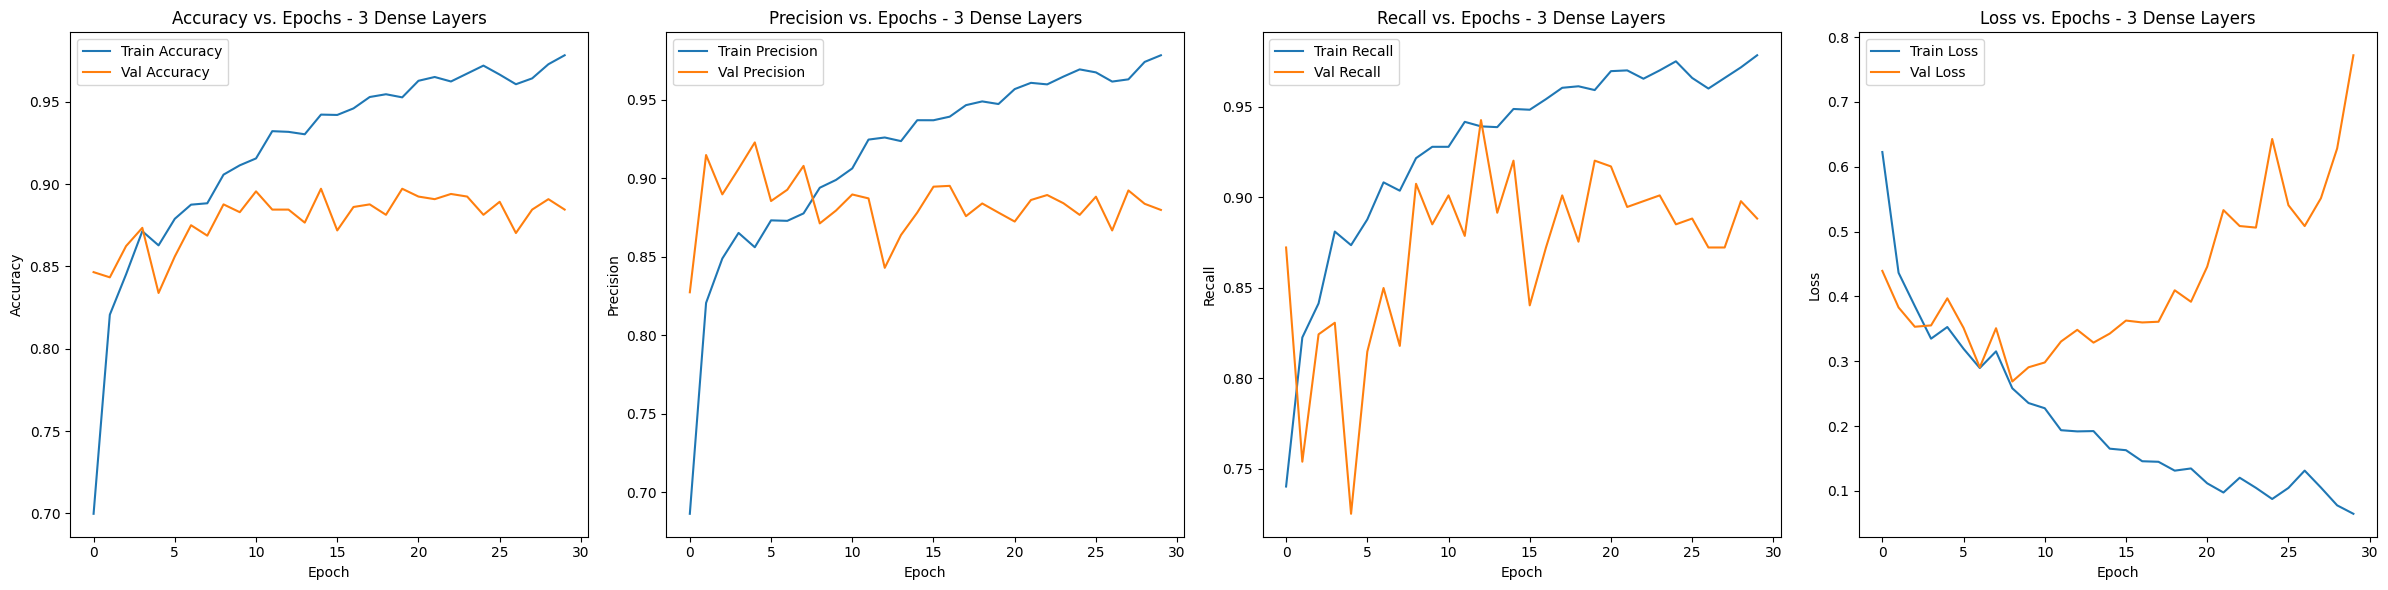


Training with 4 Dense Layers
Epoch 1/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 396s 5s/step - accuracy: 0.6347 - loss: 0.7964 - precision: 0.6267 - recall: 0.6358 - val_accuracy: 0.8513 - val_loss: 0.4143 - val_precision: 0.8869 - val_recall: 0.8019
Epoch 2/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 379s 5s/step - accuracy: 0.8269 - loss: 0.4316 - precision: 0.8209 - recall: 0.8351 - val_accuracy: 0.8497 - val_loss: 0.3954 - val_precision: 0.8949 - val_recall: 0.7891
Epoch 3/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 381s 5s/step - accuracy: 0.8348 - loss: 0.4072 - precision: 0.8346 - recall: 0.8341 - val_accuracy: 0.8528 - val_loss: 0.3668 - val_precision: 0.8957 - val_recall: 0.7955
Epoch 4/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 389s 5s/step - accuracy: 0.8688 - loss: 0.3569 - precision: 0.8728 - recall: 0.8625 - val_accuracy: 0.8449 - val_loss: 0.3863 - val_precision: 0.8996 - val_recall: 0.7732
Epoch 5/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 386s 5s/step - accuracy: 0.8604 - loss: 0.3448 - precision: 0.8568 - recall: 0.8637 - val_accura

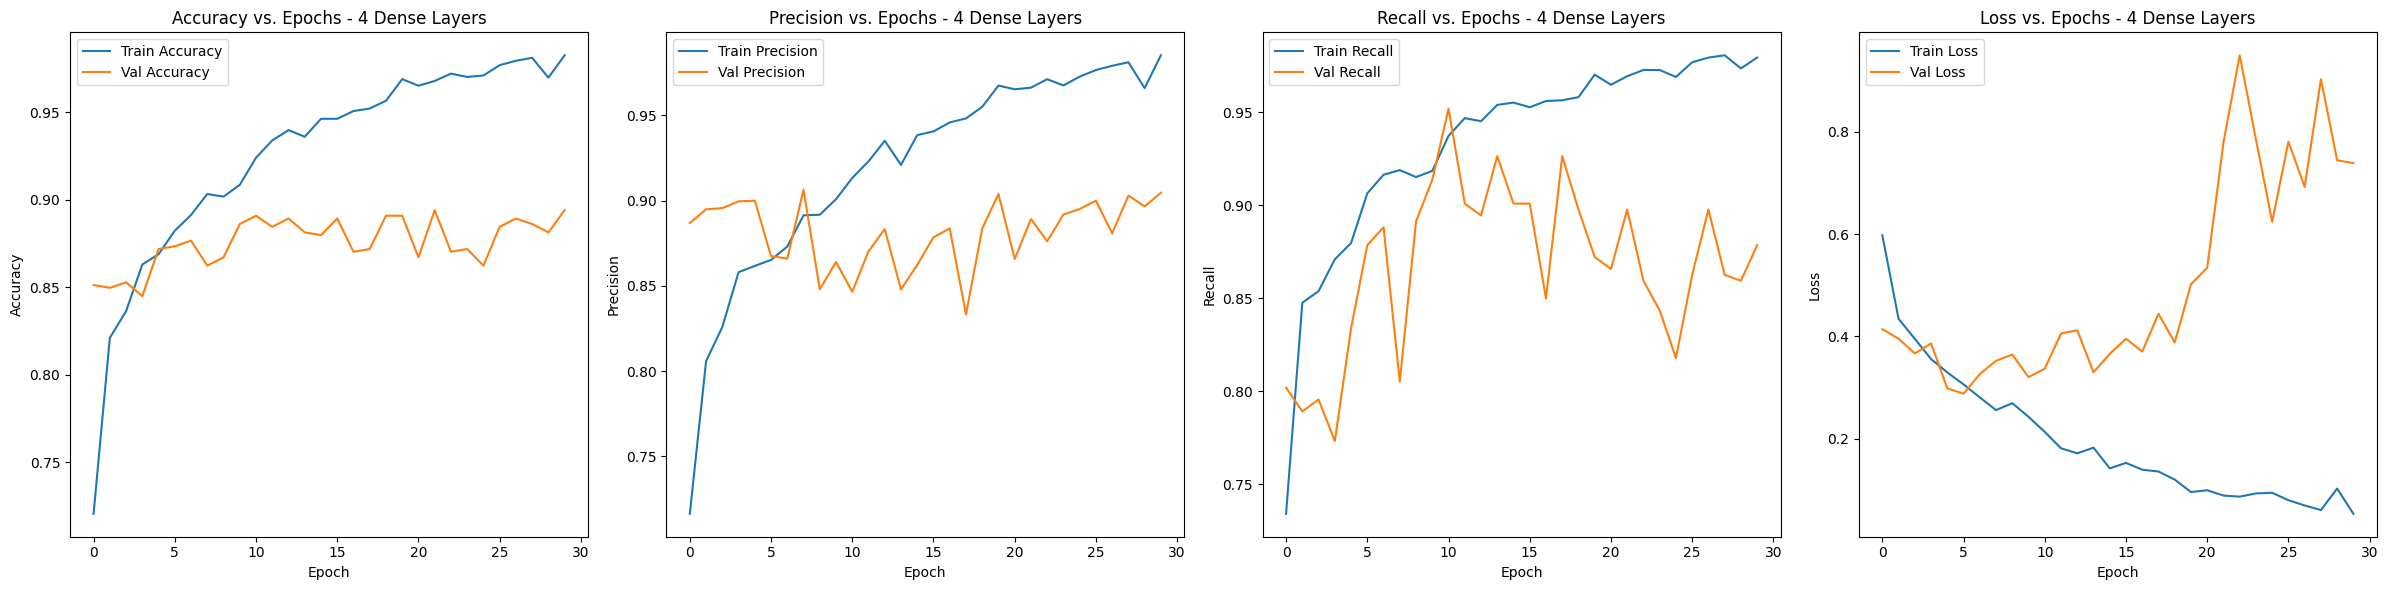

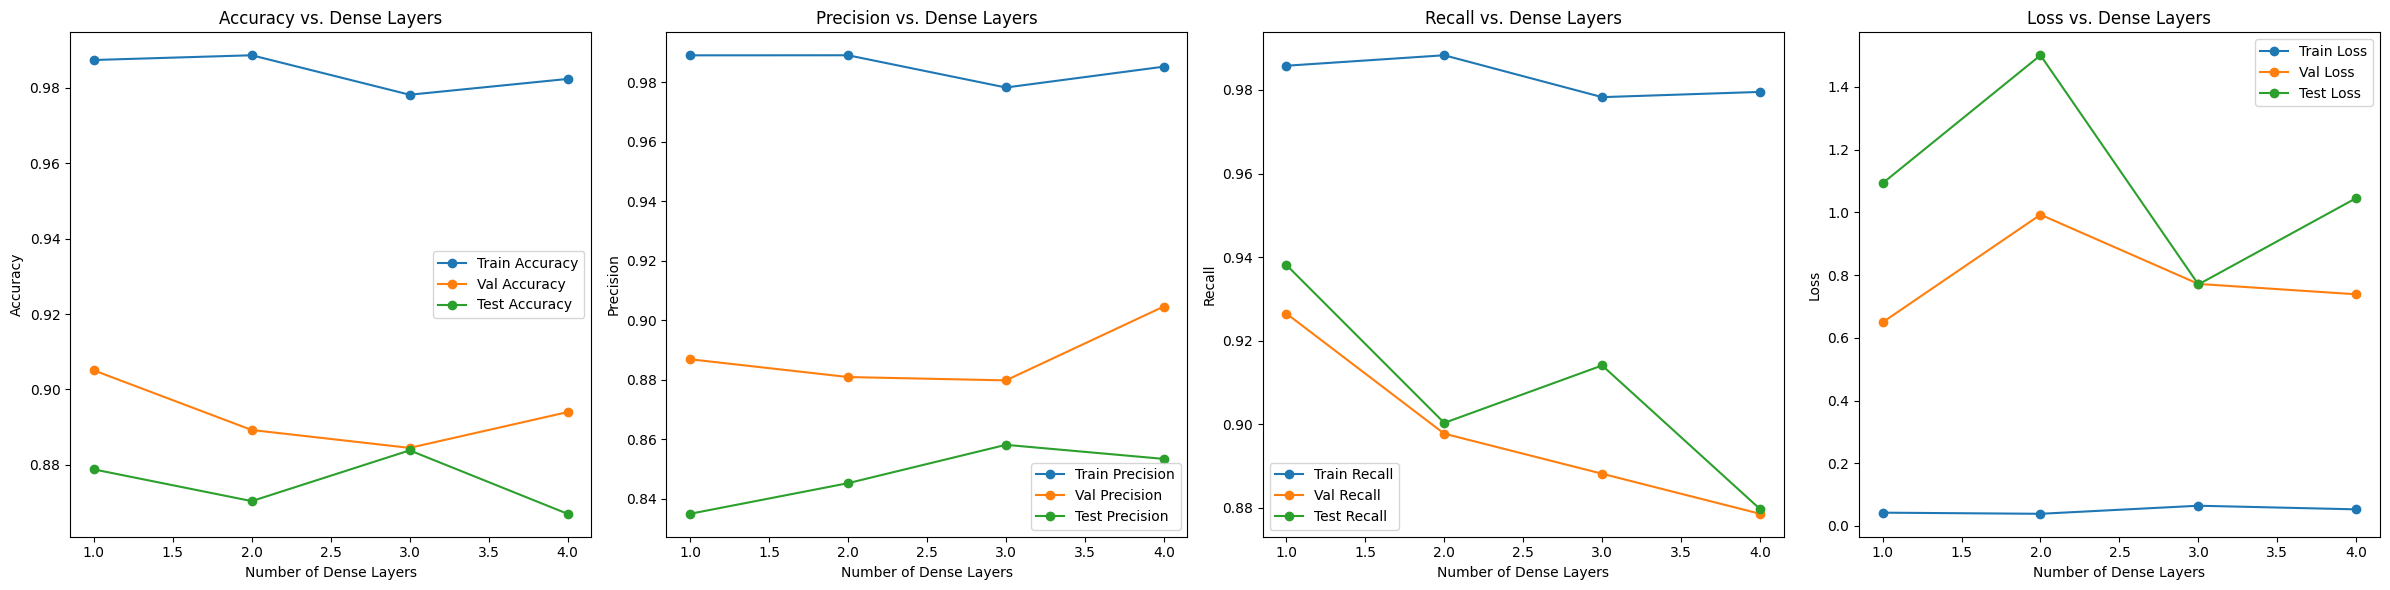

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models, metrics
import numpy as np
import matplotlib.pyplot as plt

dense_layer_counts = [1, 2, 3, 4]
batch_size = 64  # Fixed

# Initialize lists to store metrics
train_accuracies, val_accuracies, test_accuracies = [], [], []
train_precisions, val_precisions, test_precisions = [], [], []
train_recalls, val_recalls, test_recalls = [], [], []
train_losses, val_losses, test_losses = [], [], []

AUTOTUNE = tf.data.AUTOTUNE

# Load datasets once since batch size is constant
train_ds = tf.keras.utils.image_dataset_from_directory(
    'processed_dataset/train',
    image_size=(512, 512),
    batch_size=batch_size,
    label_mode='binary'
).cache().prefetch(buffer_size=AUTOTUNE)

val_ds = tf.keras.utils.image_dataset_from_directory(
    'processed_dataset/val',
    image_size=(512, 512),
    batch_size=batch_size,
    label_mode='binary'
).cache().prefetch(buffer_size=AUTOTUNE)

test_ds = tf.keras.utils.image_dataset_from_directory(
    'processed_dataset/test',
    image_size=(512, 512),
    batch_size=batch_size,
    label_mode='binary'
).cache().prefetch(buffer_size=AUTOTUNE)

for dense_layers in dense_layer_counts:
    print(f"\nTraining with {dense_layers} Dense Layers")
    
    # Build model
    model = models.Sequential([
        layers.Input(shape=(512, 512, 3)),
        layers.Rescaling(1./255),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Flatten()
    ])
    
    # Add variable number of Dense layers
    for _ in range(dense_layers):
        model.add(layers.Dense(128, activation='relu'))

    # Output layer
    model.add(layers.Dense(1, activation='sigmoid'))
    
    # Compile model
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=[
            'accuracy',
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall')
        ]
    )
    
    # Train model
    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=30
    )
    
    # Evaluate model
    test_loss, test_acc, test_precision, test_recall = model.evaluate(test_ds)
    
    print(f"Dense Layers {dense_layers}:")
    print(f"Test Accuracy: {test_acc:.3f}")
    print(f"Test Precision: {test_precision:.3f}")
    print(f"Test Recall: {test_recall:.3f}")
    print(f"Test Loss: {test_loss:.3f}")
    
    # History metrics
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    precision = history.history['precision']
    val_precision = history.history['val_precision']
    recall = history.history['recall']
    val_recall = history.history['val_recall']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Store final epoch values
    train_accuracies.append(acc[-1])
    val_accuracies.append(val_acc[-1])
    test_accuracies.append(test_acc)

    train_precisions.append(precision[-1])
    val_precisions.append(val_precision[-1])
    test_precisions.append(test_precision)

    train_recalls.append(recall[-1])
    val_recalls.append(val_recall[-1])
    test_recalls.append(test_recall)

    train_losses.append(loss[-1])
    val_losses.append(val_loss[-1])
    test_losses.append(test_loss)
    
    # Plot metrics per epoch
    epochs_range = range(len(acc))
    plt.figure(figsize=(24, 6))
    
    plt.subplot(1, 4, 1)
    plt.plot(epochs_range, acc, label='Train Accuracy')
    plt.plot(epochs_range, val_acc, label='Val Accuracy')
    plt.title(f'Accuracy vs. Epochs - {dense_layers} Dense Layers')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 4, 2)
    plt.plot(epochs_range, precision, label='Train Precision')
    plt.plot(epochs_range, val_precision, label='Val Precision')
    plt.title(f'Precision vs. Epochs - {dense_layers} Dense Layers')
    plt.xlabel('Epoch')
    plt.ylabel('Precision')
    plt.legend()
    
    plt.subplot(1, 4, 3)
    plt.plot(epochs_range, recall, label='Train Recall')
    plt.plot(epochs_range, val_recall, label='Val Recall')
    plt.title(f'Recall vs. Epochs - {dense_layers} Dense Layers')
    plt.xlabel('Epoch')
    plt.ylabel('Recall')
    plt.legend()
    
    plt.subplot(1, 4, 4)
    plt.plot(epochs_range, loss, label='Train Loss')
    plt.plot(epochs_range, val_loss, label='Val Loss')
    plt.title(f'Loss vs. Epochs - {dense_layers} Dense Layers')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Plot final metrics vs number of dense layers
plt.figure(figsize=(24, 6))

plt.subplot(1, 4, 1)
plt.plot(dense_layer_counts, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(dense_layer_counts, val_accuracies, label='Val Accuracy', marker='o')
plt.plot(dense_layer_counts, test_accuracies, label='Test Accuracy', marker='o')
plt.title('Accuracy vs. Dense Layers')
plt.xlabel('Number of Dense Layers')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 4, 2)
plt.plot(dense_layer_counts, train_precisions, label='Train Precision', marker='o')
plt.plot(dense_layer_counts, val_precisions, label='Val Precision', marker='o')
plt.plot(dense_layer_counts, test_precisions, label='Test Precision', marker='o')
plt.title('Precision vs. Dense Layers')
plt.xlabel('Number of Dense Layers')
plt.ylabel('Precision')
plt.legend()

plt.subplot(1, 4, 3)
plt.plot(dense_layer_counts, train_recalls, label='Train Recall', marker='o')
plt.plot(dense_layer_counts, val_recalls, label='Val Recall', marker='o')
plt.plot(dense_layer_counts, test_recalls, label='Test Recall', marker='o')
plt.title('Recall vs. Dense Layers')
plt.xlabel('Number of Dense Layers')
plt.ylabel('Recall')
plt.legend()

plt.subplot(1, 4, 4)
plt.plot(dense_layer_counts, train_losses, label='Train Loss', marker='o')
plt.plot(dense_layer_counts, val_losses, label='Val Loss', marker='o')
plt.plot(dense_layer_counts, test_losses, label='Test Loss', marker='o')
plt.title('Loss vs. Dense Layers')
plt.xlabel('Number of Dense Layers')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()